In [1]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Bagging

In [3]:
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna().reset_index(drop=True)
X, y = penguins.drop(columns='species'), penguins['species']
np.random.seed(42)
test_size = int(len(y)*0.25)
test_indxs = np.random.choice(np.arange(len(y)), test_size, replace=False)
X_train, y_train = X.drop(test_indxs), y.drop(test_indxs)
X_test, y_test = X.loc[test_indxs], y.loc[test_indxs]
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(y_test.shape)

(83,)


In [4]:
bagger1 = BaggingClassifier(n_estimators=160, random_state=11)
bagger1.fit(X_train, y_train)
bagger2 = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=160, random_state=11)
bagger2.fit(X_train, y_train)
print(f'bagger1: {np.mean(bagger1.predict(X_test)==y_test)}, \nbagger2: {np.mean(bagger2.predict(X_test)==y_test)}')

bagger1: 0.9879518072289156, 
bagger2: 0.9759036144578314


### RandomForests

In [5]:
forest = RandomForestClassifier(n_estimators=160, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
forest.fit(X_train, y_train)
print(f'Forest: {np.mean(forest.predict(X_test)==y_test)}')

Forest: 0.9879518072289156


### AdaBoost Regression

In [6]:

tips = sns.load_dataset('tips')
tips = tips.dropna().reset_index(drop = True)
X = tips.drop(columns = 'tip')
y = tips['tip']

## Train-test split
np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = X.drop(test_idxs)
y_train = y.drop(test_idxs)
X_test = X.loc[test_idxs]
y_test = y.loc[test_idxs]

c:\python\python3.9.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


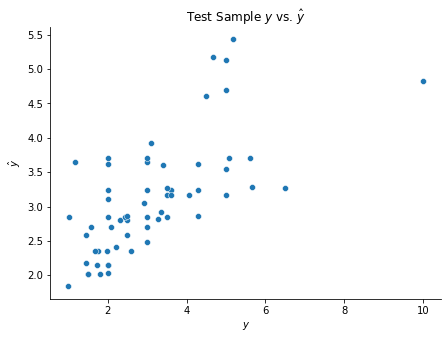

In [7]:
from sklearn.ensemble import AdaBoostRegressor

## Get dummies
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

## Build model
abr = AdaBoostRegressor(n_estimators = 50)
abr.fit(X_train, y_train)
y_test_hat = abr.predict(X_test)

## Visualize predictions
fig, ax = plt.subplots(figsize = (7, 5))
sns.scatterplot(y_test, y_test_hat)
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'Test Sample $y$ vs. $\hat{y}$')
sns.despine()

### AdaBoost Regression

In [8]:
## Load penguins data
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna().reset_index(drop = True)
X = penguins.drop(columns = 'species')
y = penguins['species']

np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = X.drop(test_idxs)
y_train = y.drop(test_idxs)
X_test = X.loc[test_idxs]
y_test = y.loc[test_idxs]

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [9]:
y_train = (y_train == 'Adelie')
y_test = (y_test == 'Adelie')

In [10]:
from sklearn.ensemble import AdaBoostClassifier

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

abc = AdaBoostClassifier(n_estimators = 50)
abc.fit(X_train, y_train)
y_test_hat = abc.predict(X_test)

np.mean(y_test_hat == y_test)

0.9759036144578314

In [11]:
from sklearn.linear_model import LogisticRegression
abc = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter = 1000))
abc.fit(X_train, y_train);